# Classify Metal or Rock cylinder from Sonar Signals

**SUMMARY:** 

This is the data set used by Gorman and Sejnowski in their study
of the classification of sonar signals using a neural network.  The
task was to train a network to discriminate between sonar signals bounced
off a metal cylinder and those bounced off a roughly cylindrical rock. <br/>

**PROBLEM DESCRIPTION:**

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar
signals off a metal cylinder at various angles and under various
conditions.  The file "sonar.rocks" contains 97 patterns obtained from
rocks under similar conditions.  The transmitted sonar signal is a
frequency-modulated chirp, rising in frequency.  The data set contains
signals obtained from a variety of different aspect angles, spanning 90
degrees for the cylinder and 180 degrees for the rock.

**Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number
represents the energy within a particular frequency band, integrated over
a certain period of time.**  The integration aperture for higher frequencies
occur later in time, since these frequencies are transmitted later during
the chirp.

**The label associated with each record contains the letter "R" if the object
is a rock and "M" if it is a mine (metal cylinder).  The numbers in the
labels are in increasing order of aspect angle, but they do not encode the
angle directly.**

**DATASET DESCRIPTION**:

The numbers in the features are in increasing order of aspect angle, but they do not encode the angle directly

[Sample analysis jupyter notebook](https://github.com/iam-armanahmed/Connectionist-Bench-Sonar-Mines-vs.-Rocks-)

## Aquire Dataset

[UCI ML repository API](https://towardsdatascience.com/introducing-a-simple-and-intuitive-python-api-for-uci-machine-learning-repository-fd2ce8eb6cd4) <br/>
[Sonar Mines vs Rocks Dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [106]:
import pandas as pd
import numpy as np

In [2]:
pd.get_option('display.width')

80

In [3]:
df = pd.read_csv('data/sonar.all-data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Analyze Data

In [4]:
df.shape

(208, 61)

[Why does pandas show string datatype as object? And how to convert it to string?](https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe/45617456)

Basically since the strings are variable length, it is stored as an object.

In [5]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

**Missing values**: 


1. Are there any missing values?
2. Which columns has missing values?
3. Drop rows with missing values (criteria: atleast k missing entries)

In [6]:
miss_clmn_count = df.isna().sum() 
clmns_miss = miss_clmn_count.index[miss_clmn_count != 0]
print('Columns with missing values are:\n', list(clmns_miss.values))

Columns with missing values are:
 []


**Each pattern is a set of 60 numbers in the range 0.0 to 1.0.**.

In [7]:
pd.set_option('precision', 3)

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


Look at the number of observations for the two classes **M** and **R** to check if the dataset is balanced or unbalanced. <br/>
Seems Reasonably balanced (tickmark)

In [9]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Draw the histograms of each to get a sense of the skewness of each feature<br/>
**TODO**: 
1. [Draw using seaborn](https://stackoverflow.com/questions/55068880/plotting-seaborn-histogram-from-each-column-in-different-subplots-facetgrid)
2. Is there any difference between **M** and **R** classes?

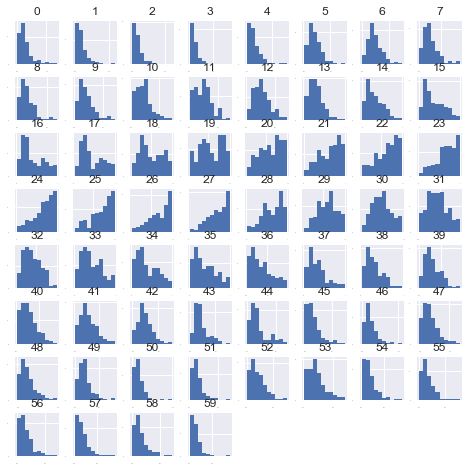

In [11]:
plt.style.use('seaborn')
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(8, 8));

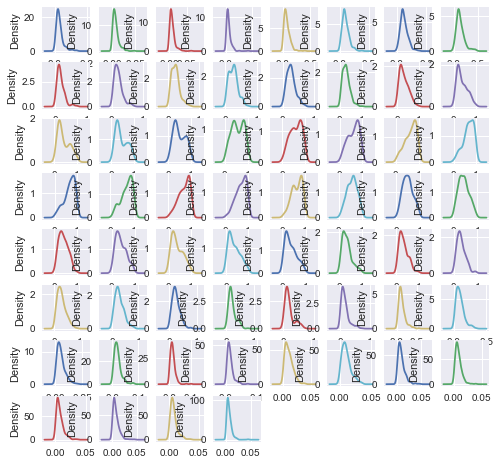

In [12]:
df.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, legend=False, figsize=(8, 8));

IndexError: index 0 is out of bounds for axis 0 with size 0

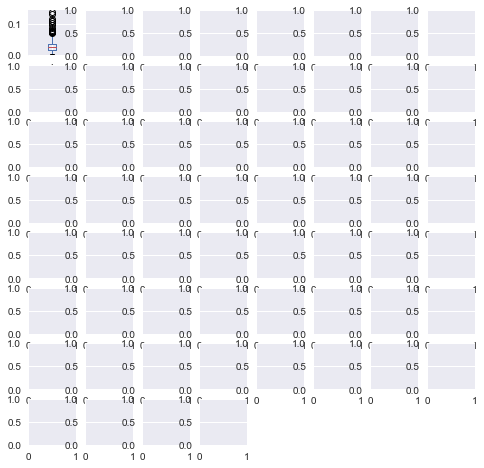

In [13]:
df.plot(kind='box', subplots=True, layout=(8, 8), sharex=False, sharey=False, legend=False, figsize=(8, 8));

Looks like there is some structure in the order of the feature columns provided. Each column is in increasing order of the aspect angle.

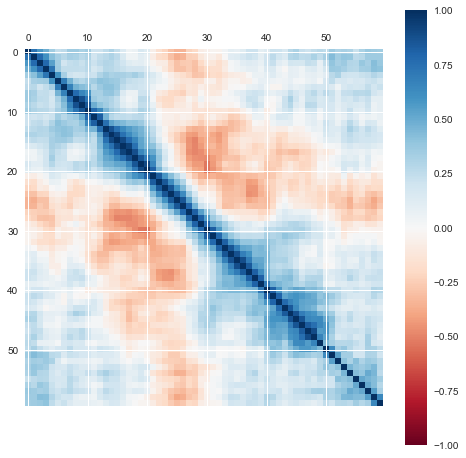

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none', cmap='RdBu')
fig.colorbar(cax);

## Featurize

In [15]:
X = df.loc[:, 0:59]
y = df.loc[:, 60]

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009


In [17]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

## train | test split - Leave the HoldOut set for validation

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Choose Models

In [20]:
# Non-linear models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Linear models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
models = {
    'LR': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'CART': DecisionTreeClassifier(),
    'NB': GaussianNB()
}

## Evaluate Models

In [22]:
scoring = 'accuracy'

### KfoldCrossValidation
**TODO**: Use RepeatedKFold, RepeatedStratifiedKFold

In [23]:
from sklearn.model_selection import KFold, cross_val_score

### Spotchecking with default hyperparameters

In [24]:
num_folds = 10
seed = 7

scores = {}
print('Accuracy:')
for name, model in models.items():
    kf = KFold(n_splits=num_folds) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    scores[name] = cv_results
    print(f"{name} : {cv_results.mean():.3f} (stdev: {cv_results.std():.3f})") # Any default way to set float precision?
    


Accuracy:
LR : 0.769 (stdev: 0.101)
LDA : 0.746 (stdev: 0.118)
KNN : 0.808 (stdev: 0.068)
SVM : 0.776 (stdev: 0.090)
CART : 0.724 (stdev: 0.101)
NB : 0.649 (stdev: 0.142)


In [25]:
scores = pd.DataFrame(scores)
scores

,LR,LDA,KNN,SVM,CART,NB
0,0.824,0.647,0.706,0.824,0.647,0.765
1,0.882,0.882,0.824,0.941,0.882,0.765
2,0.882,0.882,0.824,0.824,0.647,0.647
3,0.706,0.647,0.765,0.706,0.765,0.824
4,0.882,0.882,0.882,0.824,0.529,0.706
5,0.706,0.647,0.706,0.647,0.706,0.471
6,0.562,0.562,0.812,0.688,0.750,0.500
7,0.688,0.688,0.812,0.750,0.875,0.375
8,0.750,0.750,0.812,0.688,0.688,0.688
9,0.812,0.875,0.938,0.875,0.750,0.750


**KNN** and **SVM** performs the best. But it's for a specific default value of hyperparameter in each model.

Text(0, 0.5, 'Crossvalidated Accuracy')

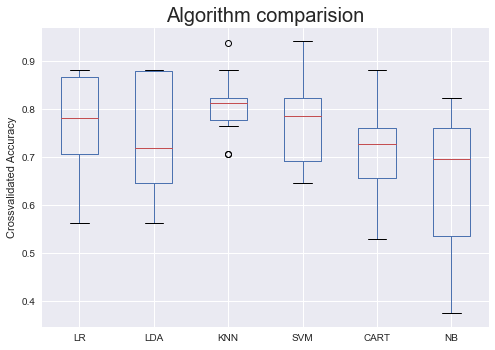

In [26]:
scores.boxplot()
plt.title('Algorithm comparision', fontsize=20)
plt.ylabel('Crossvalidated Accuracy')

## Does feature scaling affect Algorithm performance?

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
pipelines = {}

for name, model in models.items():
    pipelines[f'Scaled{name}'] = Pipeline([('Scaler', StandardScaler()), (name, model)])
    


In [29]:
print('Accuracy:')
scores_scaled = {}
for name, model in pipelines.items():
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scores_scaled[name] = cv_results
    print(f'{name} : {cv_results.mean():.3f} (stdev: {cv_results.std():.3f})')

Accuracy:
ScaledLR : 0.740 (stdev: 0.095)
ScaledLDA : 0.746 (stdev: 0.118)
ScaledKNN : 0.826 (stdev: 0.055)
ScaledSVM : 0.836 (stdev: 0.089)
ScaledCART : 0.711 (stdev: 0.131)
ScaledNB : 0.649 (stdev: 0.142)


In [30]:
scores_scaled = pd.DataFrame(scores_scaled)
scores_scaled

,ScaledLR,ScaledLDA,ScaledKNN,ScaledSVM,ScaledCART,ScaledNB
0,0.765,0.647,0.706,0.882,0.588,0.765
1,0.706,0.882,0.824,0.941,0.824,0.765
2,0.765,0.882,0.882,0.882,0.824,0.647
3,0.647,0.647,0.882,0.882,0.765,0.824
4,0.941,0.882,0.765,0.824,0.529,0.706
5,0.706,0.647,0.824,0.765,0.647,0.471
6,0.562,0.562,0.812,0.688,0.812,0.500
7,0.750,0.688,0.875,0.938,0.938,0.375
8,0.750,0.750,0.812,0.688,0.562,0.688
9,0.812,0.875,0.875,0.875,0.625,0.750


(0, 1)

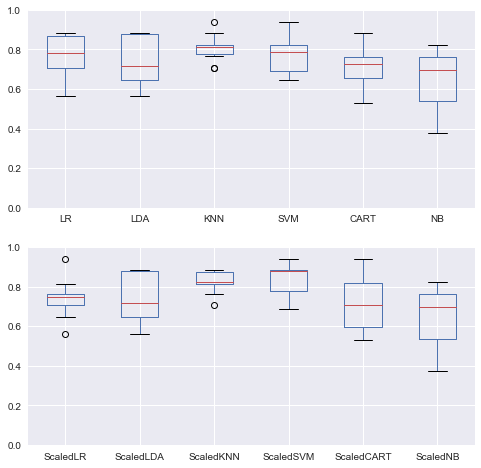

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharey=True)
scores.boxplot(ax=ax1)
scores_scaled.boxplot(ax=ax2);
plt.ylim(0, 1)

**TODO**: Before and after scaling barplot of accuracy

In [32]:
scores_mean = scores.melt(var_name='model').groupby('model').mean().reset_index()
scores_scaled_mean = scores_scaled.melt(var_name='model').groupby('model').mean().reset_index()

In [33]:
scores_scaled_mean['model'] = scores_scaled_mean.model.map({f'Scaled{nm}': nm for nm in models.keys()})

In [34]:
scores_mean['scaled'] = 'NO'
scores_scaled_mean['scaled'] = 'YES'

In [35]:
scores_comp = pd.concat([scores_mean, scores_scaled_mean],axis=0)

**SVM** accuracy improved after feature scaling. **KNN** also slightly improved.

(0, 1)

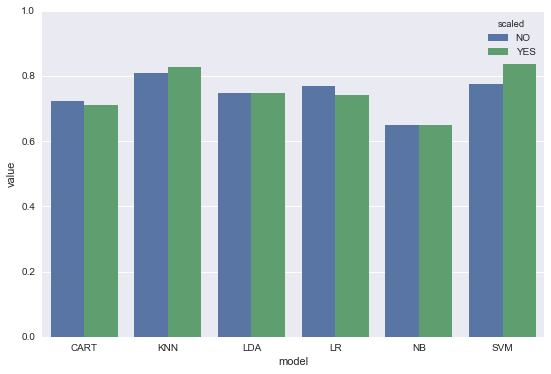

In [39]:
plt.figure(figsize=(9, 6))
sns.barplot(x='model', y='value', hue='scaled', data=scores_comp)
plt.ylim(0, 1)

## Hyperparameter optimization
Here, I will leave out other algorithms for Hyperparameter optimization for simplicity and focus only on **KNN** and **SVM**.

* Create a standard scaler from training data
* Scale the training data and the test data

In [137]:
scaler = StandardScaler().fit(X_train) # Use this scaler with test data as well
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [138]:
from sklearn.model_selection import GridSearchCV

### KNN

In [139]:
k_choices = range(1, 21)
param_grid = {'n_neighbors': k_choices}
kfold = KFold(num_folds)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring=scoring)
grid_result = grid.fit(rescaledX_train, y_train)

In [140]:
kfoldCV_df = (pd.DataFrame(grid_result.cv_results_)[['mean_test_score', 'std_test_score', 
                                                     'params', 'param_n_neighbors',
                                                     'rank_test_score']]
              .sort_values('rank_test_score'))

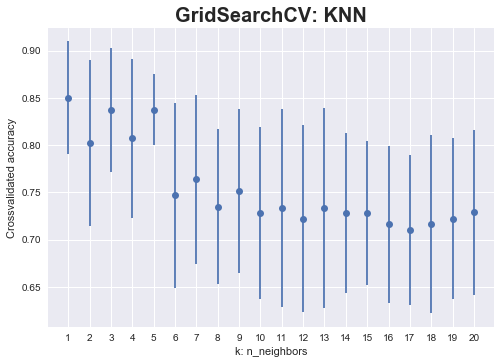

In [141]:
plt.errorbar(x=kfoldCV_df.param_n_neighbors, y=kfoldCV_df.mean_test_score, 
             yerr=kfoldCV_df.std_test_score, fmt='o')
plt.xticks(range(1, 21))
plt.xlabel('k: n_neighbors')
plt.ylabel('Crossvalidated accuracy')
plt.title('GridSearchCV: KNN', fontweight='bold', fontsize=20);

**K: n_neighbors = 1** has the best crossvalidated accuracy

In [142]:
knn = grid_result.best_estimator_
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### KNN: test accuracy

In [143]:
from sklearn import metrics

In [157]:
y_pred = knn.predict(rescaledX_test)

In [158]:
metrics.accuracy_score(y_test, y_pred)

0.8095238095238095

### SVM
Hyperparameters to tune:
1. **C**: How much to relax the margin
2. **kernel**: The type of kernel to use

In [145]:
c_vals = np.arange(0.1, 2.1, 0.1)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C':c_vals, 'kernel': kernels}

In [146]:
svm = SVC()
kfold = KFold(num_folds)
grid = GridSearchCV(svm, param_grid, scoring=scoring, cv=kfold)
grid_results = grid.fit(rescaledX_train, y_train)

In [147]:
kfoldCV_df = pd.DataFrame(grid_results.cv_results_)[['mean_test_score', 'std_test_score',
                                                    'params', 'rank_test_score']].sort_values('rank_test_score')

In [148]:
kfoldCV_df.head()

,mean_test_score,std_test_score,params,rank_test_score
78,0.872,0.098,"{'C': 2.0, 'kernel': 'rbf'}",1
58,0.866,0.091,"{'C': 1.5000000000000002, 'kernel': 'rbf'}",2
74,0.866,0.095,"{'C': 1.9000000000000001, 'kernel': 'rbf'}",2
54,0.866,0.091,"{'C': 1.4000000000000001, 'kernel': 'rbf'}",2
70,0.866,0.095,"{'C': 1.8000000000000003, 'kernel': 'rbf'}",2


**SVM** with $C = 2$ and $kernel = rbf$ has the best crossvalidated accuracy

In [149]:
svm = grid_results.best_estimator_
svm

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### SVM: test accuracy
Much better than KNN test accuracy

In [186]:
y_pred = svm.predict(rescaledX_test)
metrics.accuracy_score(y_test, y_pred)

0.9285714285714286

## Ensemble methods
Two boosting and bagging methods:
* **Boosting**: AdaBoost (AB), and Gradient Boosting Machines (GBM)
* **Bagging**: Random Forests (RF) and Extra Trees (ET)

No data standardized is used in this case as all the 4 algorithms are less sensitive to data distributions

In [152]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [153]:
ensembles = {
    'AB': AdaBoostClassifier(),
    'GBM': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(),
    'ET': ExtraTreesClassifier()}

print('Accuracy:')
scores_ens = {}

kfold = KFold(num_folds)
for name, model in ensembles.items():
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scores_ens[name] = cv_result
    print(f'{name} : {cv_result.mean():.3f} ({cv_result.std():.3f})')

Accuracy:
AB : 0.814 (0.066)
GBM : 0.847 (0.108)
RF : 0.813 (0.111)
ET : 0.872 (0.080)


In [154]:
scores_ensdf = pd.DataFrame(scores_ens)
scores_ensdf

,AB,GBM,RF,ET
0,0.706,0.765,0.882,0.882
1,0.824,1.000,0.941,1.000
2,0.882,1.000,0.882,1.000
3,0.824,0.824,0.706,0.824
4,0.824,0.941,0.824,0.941
5,0.706,0.882,0.706,0.824
6,0.812,0.688,0.750,0.750
7,0.812,0.812,1.000,0.875
8,0.812,0.688,0.625,0.812
9,0.938,0.875,0.812,0.812


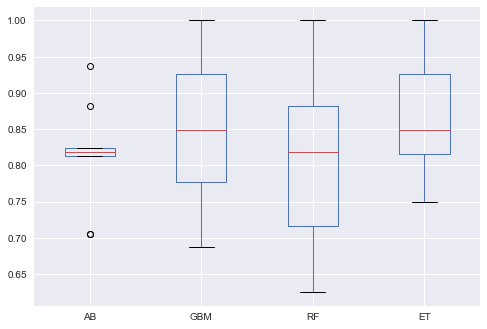

In [155]:
scores_ensdf.boxplot()

**GBM** has a mean crossvalidated accuracy of about 0.85, without much negative skew so it shows promise. <br/> **ET** also has good performance as it has a positive skew.

**TODO**: Hyperparameter tuning for the ensemble models

## Finalize model

**SVM** with $C = 2$  and $kernel = rbf$ had the best accuracy (~92%). Further **SVM** is a low complexity model. It performs marginally better with standardized data.

In [182]:
y_pred = svm.predict(rescaledX_test)

In [188]:
metrics.accuracy_score(y_test, y_pred)

0.9285714285714286

In [189]:
metrics.confusion_matrix(y_test, y_pred)

array([[25,  2],
       [ 1, 14]], dtype=int64)

In [190]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



## Summary
* Problem definition
* Analyze data
* Choose models
    * **Linear models**: LogisticRegression, LinearDiscriminantAnalyses 
    * **Non-Linear models**: KNeighborsClassifier, SVC, DecisionTreeClassifier, GaussianNB
    
* Evaluate models (KFoldCrossValidation) (Default params) (KNN performed best)
* Evaluate models with scaled training data (KFoldCrossValidation) (Default params) (KNN, SVM performed best and showed improvement)
* Hyperparameter tuning 
* Hyperparameter tuning - Scaled Features
* Ensemble methods
    * **Boosting**: AdaBoost (AB), GradientBoostingMachines (GBM)
    * **Bagging**: RandomForestClassifier (RF), ExtraTreesClassifier (ET)
* Finalize model
    